In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Daten/mundharm.csv", skiprows=2, delimiter=',')



Text(0, 0.5, 'Spannung in mV')

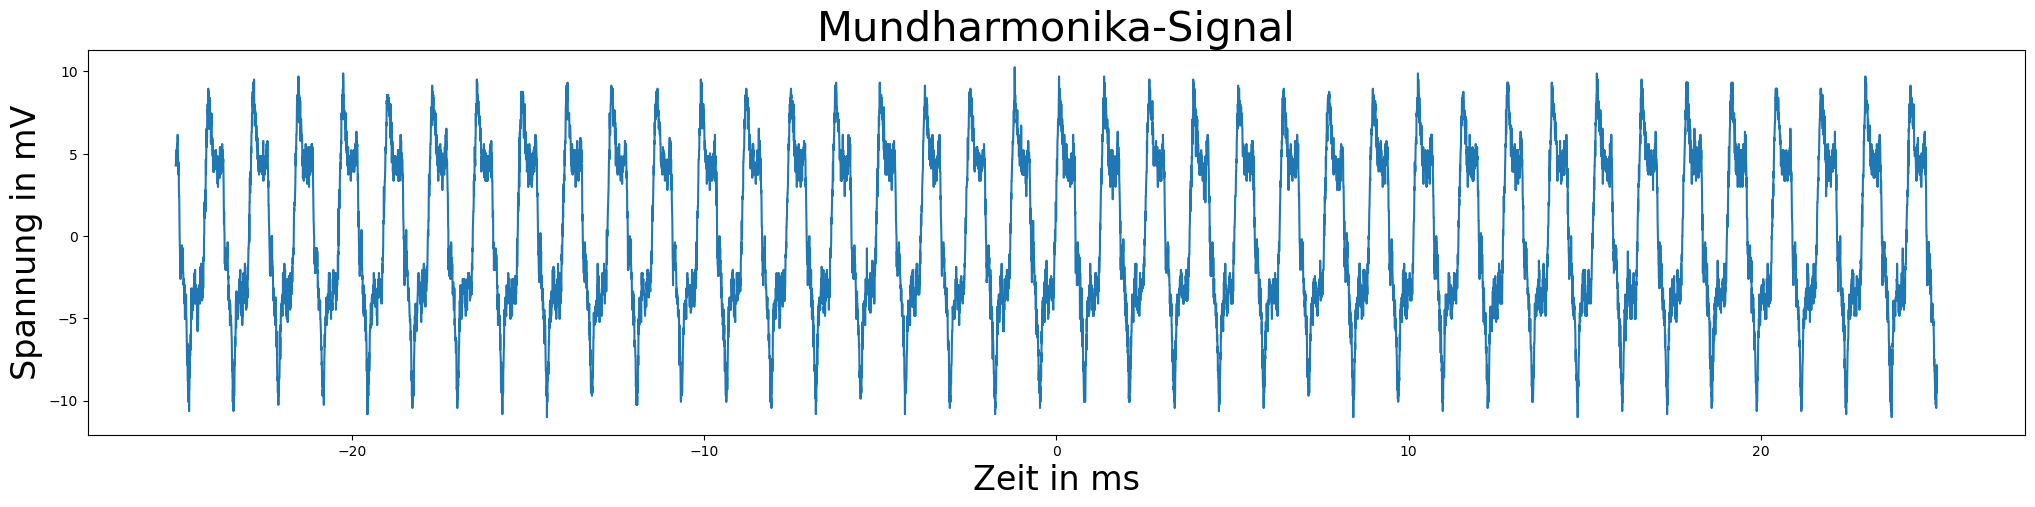

In [9]:
fig, axes = plt.subplots(figsize=(25,5))

axes.plot(data[:,0], data[:,1])
axes.set_title("Mundharmonika-Signal", fontsize=30)
axes.set_xlabel("Zeit in ms", fontsize=24)
axes.set_ylabel("Spannung in mV", fontsize=24)

# Teilausschnitt

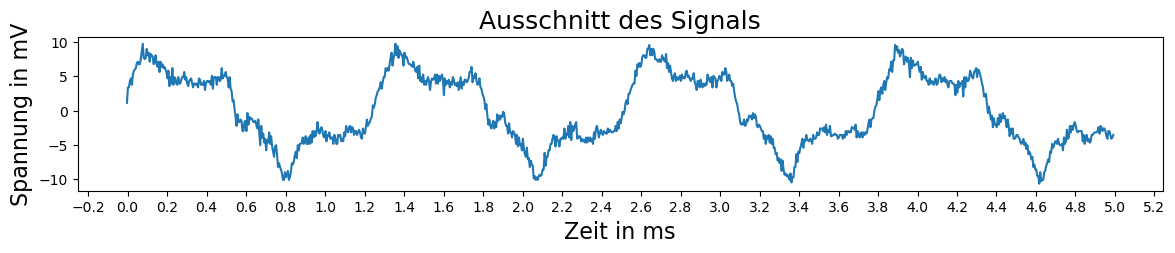

In [19]:
fig2, axes2 = plt.subplots(figsize=(14,2))

axes2.set_title("Ausschnitt des Signals", fontsize=18)
axes2.set_xlabel("Zeit in ms", fontsize=16)
axes2.set_ylabel("Spannung in mV", fontsize=16)
axes2.locator_params(axis="x", nbins=40)
axes2.plot(data[5000:6000,0], data[5000:6000,1])

In [4]:
Grundperiode = 0.7
Grundfrequenz = round(1/0.0007, 4)
Signaldauer = 0.05
Abtastintervall = 0.05 / 10004 # Dauer zwischen Abtastpunkten in Sekunden
Abtastfrequenz = 1/Abtastintervall # Abtastpunkte in Hz
Signallaenge = len(data)


print("Grundperiode = " + str(Grundperiode) + "ms")
print("Grundfrequenz = " + str(Grundfrequenz) + "Hz")
print("Signaldauer = " + str(Signaldauer) + "s")
print("Abtastfrequenz = " + str(Abtastfrequenz) + "Hz") 
print("Signallänge = " + str(Signallaenge) + " Abtastpunkte") # Anzahl der Abtastzeitpunkte
print("Abtastintervall = " + str(Abtastintervall) + "s")

Grundperiode = 0.7ms
Grundfrequenz = 1428.5714Hz
Signaldauer = 0.05s
Abtastfrequenz = 200080.0Hz
Signallänge = 10003 Abtastpunkte
Abtastintervall = 4.998000799680128e-06s


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

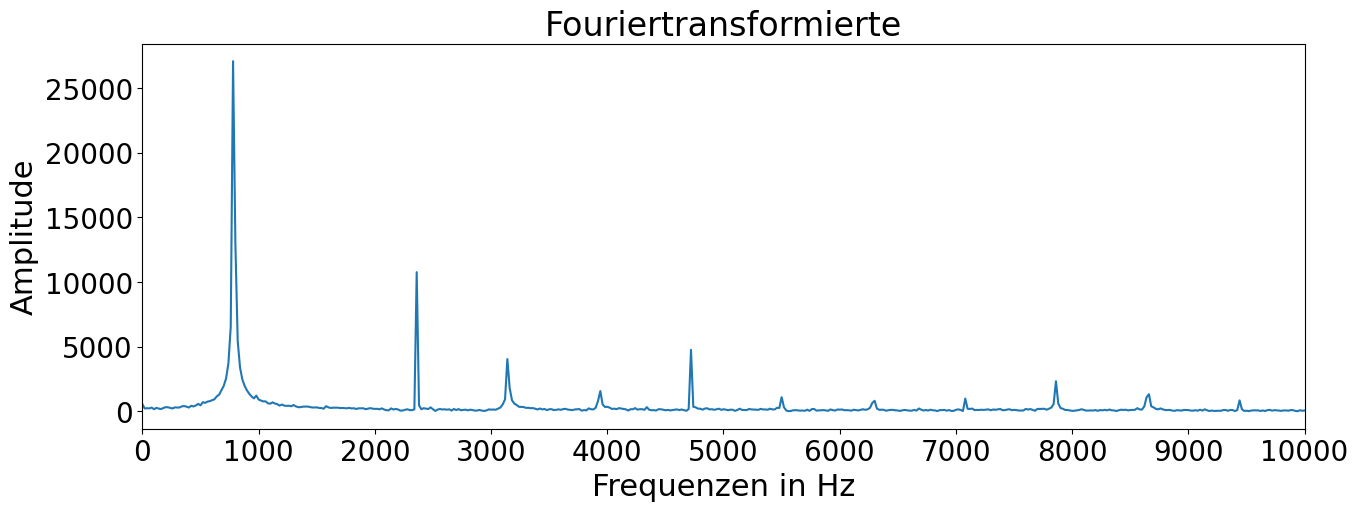

In [5]:
F = np.fft.fft(data[:,1])

# Umrechnung des Spektrums in Herz

F_hertz = []

for n, freq in enumerate(F):
    F_hertz.append(n/(Signallaenge*Abtastintervall))
F_hertz = np.array(F_hertz) 

fig3, axes3 = plt.subplots(figsize=(15,5))


axes3.set_title("Fouriertransformierte", fontsize=24)
axes3.set_xlabel("Frequenzen in Hz", fontsize=22)
axes3.set_ylabel("Amplitude", fontsize=22)
axes3.plot(F_hertz[:len(F_hertz) // 2], np.abs(F[:len(F) // 2]))
ticks2 = np.arange(0, len(F_hertz), 1000)
axes3.set_xticks(ticks2)
plt.xlim(0, len(F_hertz))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

2. Frequenzgang von Lautsprechen